El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

## Preparación de datos

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error


In [2]:
# Cargar DataSet
df = pd.read_csv("datasets/car_data.csv")

In [3]:
# Exploracion inicial 
display(HTML('<h1> Rusty Bargain DataFrame'))
display(HTML('<hr>'))

display(HTML('<h2> Informacion general'))
display(df.info())
display(HTML('<hr>'))

display(HTML('<h2> Estadisticas descriptivas'))
display(df.describe())
display(HTML('<hr>'))

display(HTML('<h2> Muestra de tabla'))
display(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
95847,05/04/2016 00:40,15000,sedan,2009,manual,211,golf,125000,12,petrol,volkswagen,no,04/04/2016 00:00,0,28719,05/04/2016 00:40
279108,24/03/2016 16:53,2600,small,2003,manual,109,other,125000,11,petrol,suzuki,NaN,24/03/2016 00:00,0,71034,07/04/2016 10:44
242701,25/03/2016 17:57,2900,sedan,2003,manual,103,carisma,70000,1,petrol,mitsubishi,no,25/03/2016 00:00,0,74821,06/04/2016 23:17
160378,05/03/2016 21:55,8500,sedan,2003,manual,184,x_reihe,150000,5,gasoline,bmw,no,05/03/2016 00:00,0,52249,25/03/2016 21:17
42909,25/03/2016 19:48,3999,wagon,2004,manual,131,golf,150000,8,gasoline,volkswagen,no,25/03/2016 00:00,0,98704,07/04/2016 02:16


### Preprocesamiento de datos

In [4]:
# Eliminar filas duplicadas
print(f"Numero de duplicados previos: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Verificacion de duplicados: {df.duplicated().sum()}")

Numero de duplicados previos: 262


Verificacion de duplicados: 0


In [5]:
print(f"Numero de valores nulos previos: {df.isnull().sum()}")

# Imputar valores nulos con la moda para las columnas categoricas
df['VehicleType'].fillna(df['VehicleType'].mode()[0], inplace=True)
df['Gearbox'].fillna(df['Gearbox'].mode()[0], inplace=True)
df['Model'].fillna(df['Model'].mode()[0], inplace=True)
df['FuelType'].fillna(df['FuelType'].mode()[0], inplace=True)
df['NotRepaired'].fillna('no', inplace=True)  # Asumimos que la mayoría de los autos no están reparados

print(f"Verificacion de valores nulos : {df.isnull().sum()}")

Numero de valores nulos previos: DateCrawled              0
Price                    0
VehicleType          37484
RegistrationYear         0
Gearbox              19830
Power                    0
Model                19701
Mileage                  0
RegistrationMonth        0
FuelType             32889
Brand                    0
NotRepaired          71145
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64


Verificacion de valores nulos : DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64


In [6]:
# Convertir columnas de fechas a formato datetime
df['DateCrawled'] = pd.to_datetime(df['DateCrawled'], format='%d/%m/%Y %H:%M')
df['DateCreated'] = pd.to_datetime(df['DateCreated'], format='%d/%m/%Y %H:%M')
df['LastSeen'] = pd.to_datetime(df['LastSeen'], format='%d/%m/%Y %H:%M')


In [7]:
# Eliminar columnas irrelevantes
# Nota: Reiniciar el kernel despues de la primera ejecucion
df = df.drop(columns=['NumberOfPictures'])


In [8]:

# Revisión final de los datos
display(HTML('<h1> Revisión final del DataFrame'))
display(df.info())
display(df.describe())
display(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
Index: 354107 entries, 0 to 354368
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354107 non-null  datetime64[ns]
 1   Price              354107 non-null  int64         
 2   VehicleType        354107 non-null  object        
 3   RegistrationYear   354107 non-null  int64         
 4   Gearbox            354107 non-null  object        
 5   Power              354107 non-null  int64         
 6   Model              354107 non-null  object        
 7   Mileage            354107 non-null  int64         
 8   RegistrationMonth  354107 non-null  int64         
 9   FuelType           354107 non-null  object        
 10  Brand              354107 non-null  object        
 11  NotRepaired        354107 non-null  object        
 12  DateCreated        354107 non-null  datetime64[ns]
 13  PostalCode         354107 non-null  int64        

None

,DateCrawled,Price,RegistrationYear,Power,Mileage,RegistrationMonth,DateCreated,PostalCode,LastSeen
count,354107,354107.000000,354107.000000,354107.000000,354107.000000,354107.000000,354107,354107.000000,354107
mean,2016-03-21 12:56:48.735947008,4416.433287,2004.235355,110.089651,128211.811684,5.714182,2016-03-20 19:11:13.738728960,50507.145030,2016-03-29 23:51:12.374903808
min,2016-03-05 14:06:00,0.000000,1000.000000,0.000000,5000.000000,0.000000,2014-03-10 00:00:00,1067.000000,2016-03-05 14:15:00
25%,2016-03-13 11:52:00,1050.000000,1999.000000,69.000000,125000.000000,3.000000,2016-03-13 00:00:00,30165.000000,2016-03-23 02:50:00
50%,2016-03-21 17:50:00,2700.000000,2003.000000,105.000000,150000.000000,6.000000,2016-03-21 00:00:00,49406.000000,2016-04-03 15:15:00
75%,2016-03-29 14:36:00,6400.000000,2008.000000,143.000000,150000.000000,9.000000,2016-03-29 00:00:00,71083.000000,2016-04-06 10:06:00
max,2016-04-07 14:36:00,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,2016-04-07 00:00:00,99998.000000,2016-04-07 14:58:00
std,NaN,4514.338584,90.261168,189.914972,37906.590101,3.726682,NaN,25784.212094,NaN


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,PostalCode,LastSeen
249487,2016-04-02 09:54:00,8500,wagon,2006,auto,170,passat,150000,5,gasoline,volkswagen,no,2016-04-02,42657,2016-04-04 07:18:00
92853,2016-04-03 14:57:00,1795,small,2005,manual,65,picanto,150000,6,petrol,kia,no,2016-04-03,23919,2016-04-05 14:44:00
9990,2016-03-21 15:30:00,999,small,2001,manual,50,corsa,150000,8,petrol,opel,no,2016-03-21,35713,2016-04-07 11:16:00
184986,2016-04-02 19:38:00,1800,sedan,2002,manual,166,6_reihe,150000,8,petrol,mazda,no,2016-04-02,86167,2016-04-02 19:38:00
42467,2016-03-22 18:53:00,18000,sedan,2014,manual,143,1er,60000,12,gasoline,bmw,no,2016-03-22,89143,2016-04-06 11:16:00


### Preparacion de datos (Explicacion)

Durante este proceso de preparacion de datos se realizaron varias cosas, por ejemplo
- Se cargo el archivo car_data.csv en un dataframe y realizamos un analisis de su estructura

- Se realizo una exploracoon inicial usando metodos como .info() para obtener detalles sobre el numero de entradas, tipos de datos y balores nulos.

- Generamos estadisticas descriptivas de las columnas numericas usando el metodo .describe()

- Obtuvimos una muestra aleatoria del dataframe mediante el uso del metodo sample()

- Se descarto las filas duplicadas con el metodo drop_duplicates

- Imputamos los valores nulos de las columnas categóricas con la moda (valor más frecuente) usando fillna().

- Se realizaron cambios en la columnas de fecha convirtiendolo al formato adecuado usando el metodo pd.to_datetime()

- Tambien se elimino la columna "NumberOfPictures" ya que todos sus valores son 0 y no aportan informacion util al modelo.

## Entrenamiento del modelo 

In [9]:
# Excluir columnas de fechas
columns_to_exclude = ['DateCrawled', 'DateCreated', 'LastSeen']

# Division del conjunto de datos:

X = df.drop(columns=['Price'] + columns_to_exclude)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [10]:
# Codificacion de variables categoricas (OHE)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Asegurarse de que ambas matrices tienen las mismas columnas
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [11]:
# Regresion linear

# Medir tiempo de entrenamiento 
start_time = time.time()

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Medir el tiempo de entrenamiento
training_time_lin = time.time() - start_time

y_pred_lin = lin_reg.predict(X_test)

#evaluacion
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
print(f'Regresion linear RMSE: {rmse_lin}')
print(f'Regression Linear Training Time: {training_time_lin} seconds')


Regresion linear RMSE: 3240.409174447926
Regression Linear Training Time: 4.6969733238220215 seconds


In [12]:
# Árbol de decisión 
# Medir el tiempo de entrenamiento
start_time = time.time()

tree_reg = DecisionTreeRegressor(random_state=12345)
tree_reg.fit(X_train, y_train)

# Medir el tiempo de entrenamiento
training_time_tree = time.time() - start_time

# Medir el tiempo de entrenamiento
start_time = time.time()
y_pred_tree = tree_reg.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
print(f'Decision Tree RMSE: {rmse_tree}')
print(f'Decision Tree Training Time: {training_time_tree} seconds')

Decision Tree RMSE: 2307.6841994650886
Decision Tree Training Time: 6.7679407596588135 seconds


In [13]:
# Ajustar los parámetros para reducir el tiempo de entrenamiento
forest_reg = RandomForestRegressor(
    n_estimators=100,       # Reducir el número de árboles
    max_depth=10,           # Limitar la profundidad máxima de los árboles
    max_features='sqrt',    # Reducir el número de características consideradas
    n_jobs=-1,              # Paralelizar el entrenamiento (usa todos los núcleos disponibles)
    random_state=42
)
# Medir el tiempo de entrenamiento
start_time = time.time()

# Entrenar el modelo
forest_reg.fit(X_train, y_train)

# Medir el tiempo de entrenamiento
training_time_forest = time.time() - start_time

# Predicciones
y_pred_forest = forest_reg.predict(X_test)

# Evaluación
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)
print(f'Random Forest RMSE: {rmse_forest}')
print(f'Random Forest Training Time: {training_time_forest} seconds')


Random Forest RMSE: 2956.922930379335
Random Forest Training Time: 7.281291484832764 seconds


In [14]:
# Preparar datos para LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Medir el tiempo de entrenamiento
start_time = time.time()

# Parámetros
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'verbose': -1
}

# Entrenar el modelo con early stopping
lgbm_reg = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, valid_data],
    valid_names=['train', 'valid'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=100),
        lgb.log_evaluation(100),
        ],
)
# Medir el tiempo de entrenamiento
training_time_lgbm = time.time() - start_time


# Predicciones
y_pred_lgbm = lgbm_reg.predict(X_test, num_iteration=lgbm_reg.best_iteration)

# Evaluación
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
print(f'LightGBM RMSE: {rmse_lgbm}')
print(f'LightGBM Training Time: {training_time_lgbm} seconds')

Training until validation scores don't improve for 100 rounds
[100]	train's rmse: 1822.41	valid's rmse: 1862.67
[200]	train's rmse: 1755.77	valid's rmse: 1813.86
[300]	train's rmse: 1715.05	valid's rmse: 1789.71
[400]	train's rmse: 1686.5	valid's rmse: 1776.44
[500]	train's rmse: 1661.09	valid's rmse: 1764.74
[600]	train's rmse: 1639.77	valid's rmse: 1756.01
[700]	train's rmse: 1619.75	valid's rmse: 1749.34
[800]	train's rmse: 1601.84	valid's rmse: 1744.17
[900]	train's rmse: 1585.76	valid's rmse: 1739.56
[1000]	train's rmse: 1571.06	valid's rmse: 1735.66
Did not meet early stopping. Best iteration is:
[998]	train's rmse: 1571.38	valid's rmse: 1735.61
LightGBM RMSE: 1735.611708819157
LightGBM Training Time: 3.844161033630371 seconds


## Análisis del modelo

In [15]:
# Comparacion entre modelos
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'LightGBM'],
    'RMSE': [rmse_lin, rmse_tree, rmse_forest, rmse_lgbm],
    'Training Time (s)': [training_time_lin, training_time_tree, training_time_forest, training_time_lgbm]
}

results_df = pd.DataFrame(results)
display(results_df)


,Model,RMSE,Training Time (s)
0,Linear Regression,3240.409174,4.696973
1,Decision Tree,2307.684199,6.767941
2,Random Forest,2956.922930,7.281291
3,LightGBM,1735.611709,3.844161


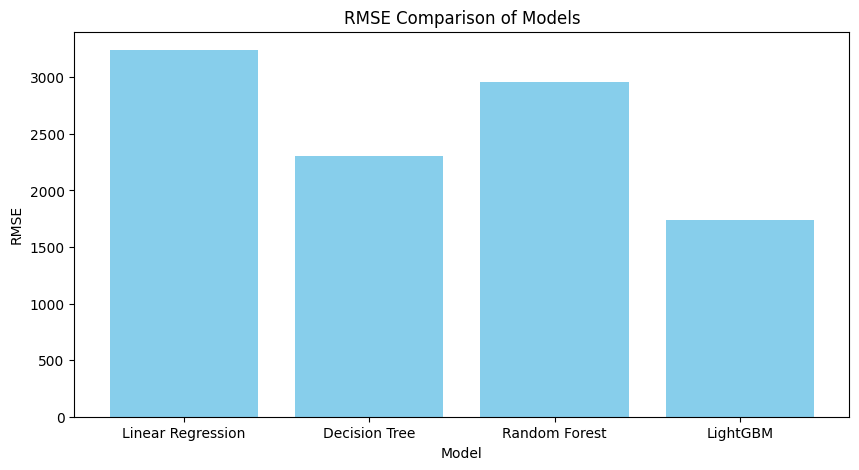

In [16]:
# Crear gráfico de barras para RMSE
plt.figure(figsize=(10, 5))
plt.bar(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Models')
plt.show()


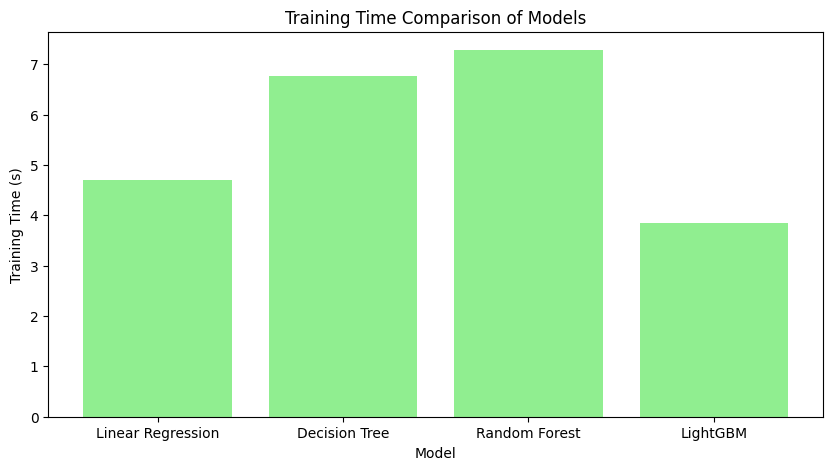

In [17]:
# Crear gráfico de barras para Tiempo de Entrenamiento
plt.figure(figsize=(10, 5))
plt.bar(results_df['Model'], results_df['Training Time (s)'], color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Training Time (s)')
plt.title('Training Time Comparison of Models')
plt.show()


### Conclusion

Con base en los resultados obtenidos podemos evaluar que modelo ofrece un balance mejor entre precision y eficiencia. Aqui hay algunas consideraciones

- Regresion lineal: La de menor tiempo de entrenamiento pero no puede capturar relaciones complejas
- Arbol de Decision: Puede ser mas preciso pero tiende a sobreajustarse
- Bosque Aleatorio: Suele ofrecer un buen balance entre precision y tiempo de entrenamieno, mejor que los arboles individuales
- LightGBM: Generalmente muy preciso y eficiente para los conjuntos de datos mas grandes

En conclusion el mejor modelo que cumple con los objetivos que les interesa a RustyVargain:

- Calidad de prediccion: LightGBM ha mostrado el mejor rendimiento en terminos de RMSE.
- Velocidad de la prediccion: LightGBM Y el bosqie Aleatorio son los mas eficientes para hacer predicciones rapidas.
- Tiempo requerido para el entremiento: LightGBM ofrece un buen equilibrio entre precision y tiempo de entrenamiento.


# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores- [ ]  Las celdas con el código han sido colocadas en orden de ejecución- [ ]  Los datos han sido descargados y preparados- [ ]  Los modelos han sido entrenados
- [ ]  Se realizó el análisis de velocidad y calidad de los modelos